In [11]:
using CSV, DataFrames
import PythonPlot as plt

In [12]:
DATA_DIR = "../data/"
IMG_DIR = "../img/"

"../img/"

## Config pyplot
- <https://matplotlib.org/stable/users/explain/customizing.html>
- <https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.rc.html#matplotlib.pyplot.rc>

In [13]:
plt.rc("font", size=13)
plt.rc("legend", fontsize=11)

Python: None

## Plot input data
electricity price and load

In [14]:
input_data = CSV.read(joinpath(DATA_DIR, "input/nominal_scenario.csv"), DataFrame)
T = nrow(input_data)
first(input_data, 3)

3×5 DataFrame
 Row │ t      P_PV     P_WT     P_Load   Price   
     │ Int64  Float64  Float64  Float64  Float64 
─────┼───────────────────────────────────────────
   1 │     1      0.0    30.09    37.76    0.324
   2 │     2      0.0    27.06    44.54    0.36
   3 │     3      0.0    26.91    48.9     0.288

In [15]:
price = input_data[:, "Price"];

Column width in 2-col IEEE is *88 mm*.
- 1 inch = 25.4 mm
- a figure of width 5 inch shows well in LaTeX with width 70 mm

In [16]:
fig = plt.figure(figsize=(5,  2))  # inch
plt.plot(1:length(price), price, "o-", label="price")
plt.xlabel("Time (h)")
plt.ylabel(raw"Price (¥/kWh)")
plt.grid(true)
# plt.legend()
fig  # show the plot

In [17]:
plt.savefig(joinpath(IMG_DIR, "price.pdf"), bbox_inches="tight")

Python: None

### Plot price, PV, WT, load into a single figure

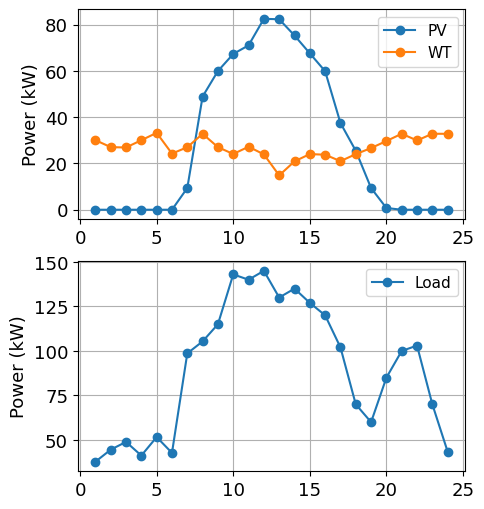

In [18]:
fig, axs = plt.subplots(2, 1, figsize=(5, 6))
axs[0].plot(1:T, input_data[!, "P_PV"], "-o", label="PV")
axs[0].plot(1:T, input_data[!, "P_WT"], "-o", label="WT")
axs[0].legend()
axs[0].grid(true)
axs[0].set_ylabel("Power (kW)")  # `plt.ylabel` instead

axs[1].plot(1:T, input_data[!, "P_Load"], "-o", label="Load")
axs[1].legend()
axs[1].grid(true)
axs[1].set_ylabel("Power (kW)")

fig

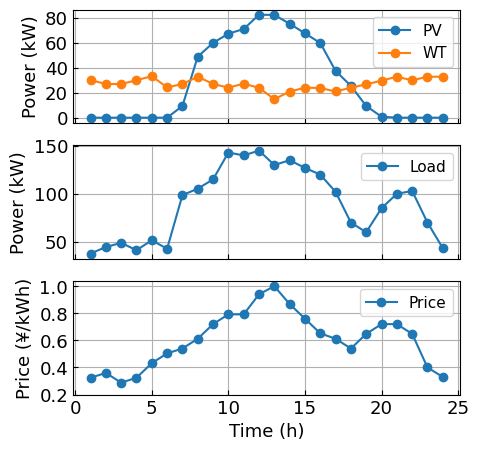

In [21]:
# use plt style API instead
fig, axs = plt.subplots(3, 1, figsize=(5, 5))
plt.sca(axs[0])  # set current axis to work on 
plt.plot(1:T, input_data[!, "P_PV"], "-o", label="PV")
plt.plot(1:T, input_data[!, "P_WT"], "-o", label="WT")
plt.legend()
# plt.xticks(Int[])  # remove xticks and tick labels
plt.tick_params(labelbottom=false, direction="in")  # remove the tick labels but keep ticks and the grid line
plt.yticks(ticks=0:20:80)
plt.grid(true)
plt.ylabel("Power (kW)")  # `plt.ylabel` instead

plt.sca(axs[1])  # set current axis to work on 
plt.plot(1:T, input_data[!, "P_Load"], "-o", label="Load")
plt.legend()
plt.grid(true)
plt.tick_params(labelbottom=false, direction="in")
plt.ylabel("Power (kW)")

plt.sca(axs[2])  # set current axis to work on 
plt.plot(1:T, input_data[!, "Price"], "-o", label="Price")
plt.legend()
plt.grid(true)
plt.ylabel(raw"Price (¥/kWh)")
plt.yticks(ticks=0.2:0.2:1.0)
plt.xlabel("Time (h)")
plt.tick_params(direction="in")

plt.savefig(joinpath(IMG_DIR, "input.pdf"), bbox_inches="tight")
fig